In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [8]:
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", names = ['symboling', 'normlized_losses','make', 'fuel_type', 'aspirations', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders','engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'])

In [9]:
car_df.head(2).transpose()

,0,1
symboling,3,3
normlized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspirations,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [46]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horse_power          float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinder               int64
dtype: object

In [48]:
car_df = car_df.drop('make', axis = 1) #dropping make here, but in real project create separate data based on make
#the different makes in the same data may not be a good idea

#dropping the following columns due to low variability filter i.e. these attributes have only one type of data stored in it,
#thus, not a good dimension
car_df = car_df.drop('fuel_type', axis = 1)
car_df = car_df.drop('engine_location', axis = 1)
car_df = car_df.drop('num_of_doors', axis = 1)
car_df = car_df.drop('body_style', axis = 1)
car_df = car_df.drop('drive_wheels', axis = 1)
car_df = car_df.drop('fuel_system', axis = 1)
car_df = car_df.drop('aspirations', axis = 1)
car_df = car_df.drop('normlized_losses', axis = 1)


KeyError: "['fuel_type'] not found in axis"

In [49]:
car_df = car_df.drop('engine_type', axis = 1)

In [50]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horse_power          float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinder               int64
dtype: object

In [51]:
car_df['cylinder'].values

array([ 4,  4,  6,  4,  5,  5,  5,  5,  5,  5,  4,  4,  6,  6,  6,  6,  6,
        6,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  6,  6, 12,  4,
        4,  4,  4,  4,  2,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  8,  8,  8,  8,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  6,
        6,  6,  6,  6,  6,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  6,  6,  6,  8,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  6,  6,  6,  6,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  6,  6,
        4], dtype=int64)

In [52]:
#replace the string numbers into numerical values for number of cylinders
car_df['cylinder'] = car_df['num_of_cylinders'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8, 'twelve':12})

In [53]:
car_df = car_df.replace('?', np.nan) #replaces " with nan which is the equivalent to null"
#car_df[car_df.isnull().any(axis=1)] #displaces records with NA

#change the attribute types from object to float type
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke'] = car_df['stroke'].astype('float64')
car_df['horse_power'] = car_df['horse_power'].astype('float64')
car_df['peak_rpm'] = car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')
#car_df['normlized_losses'] = car_df['normlized_losses'].astype('int64')


In [54]:
#fill up NAN in numeric columns with the median value of that column value
car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore'] = car_df['bore'].fillna(car_df['bore'].median())
car_df['horse_power'] = car_df['horse_power'].fillna(car_df['horse_power'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())

In [55]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horse_power          float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinder               int64
dtype: object

In [56]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [30]:
#importing seaborn for statistical plots
import seaborn as sns

In [31]:
car_df_attr = car_df.iloc[:1:16]

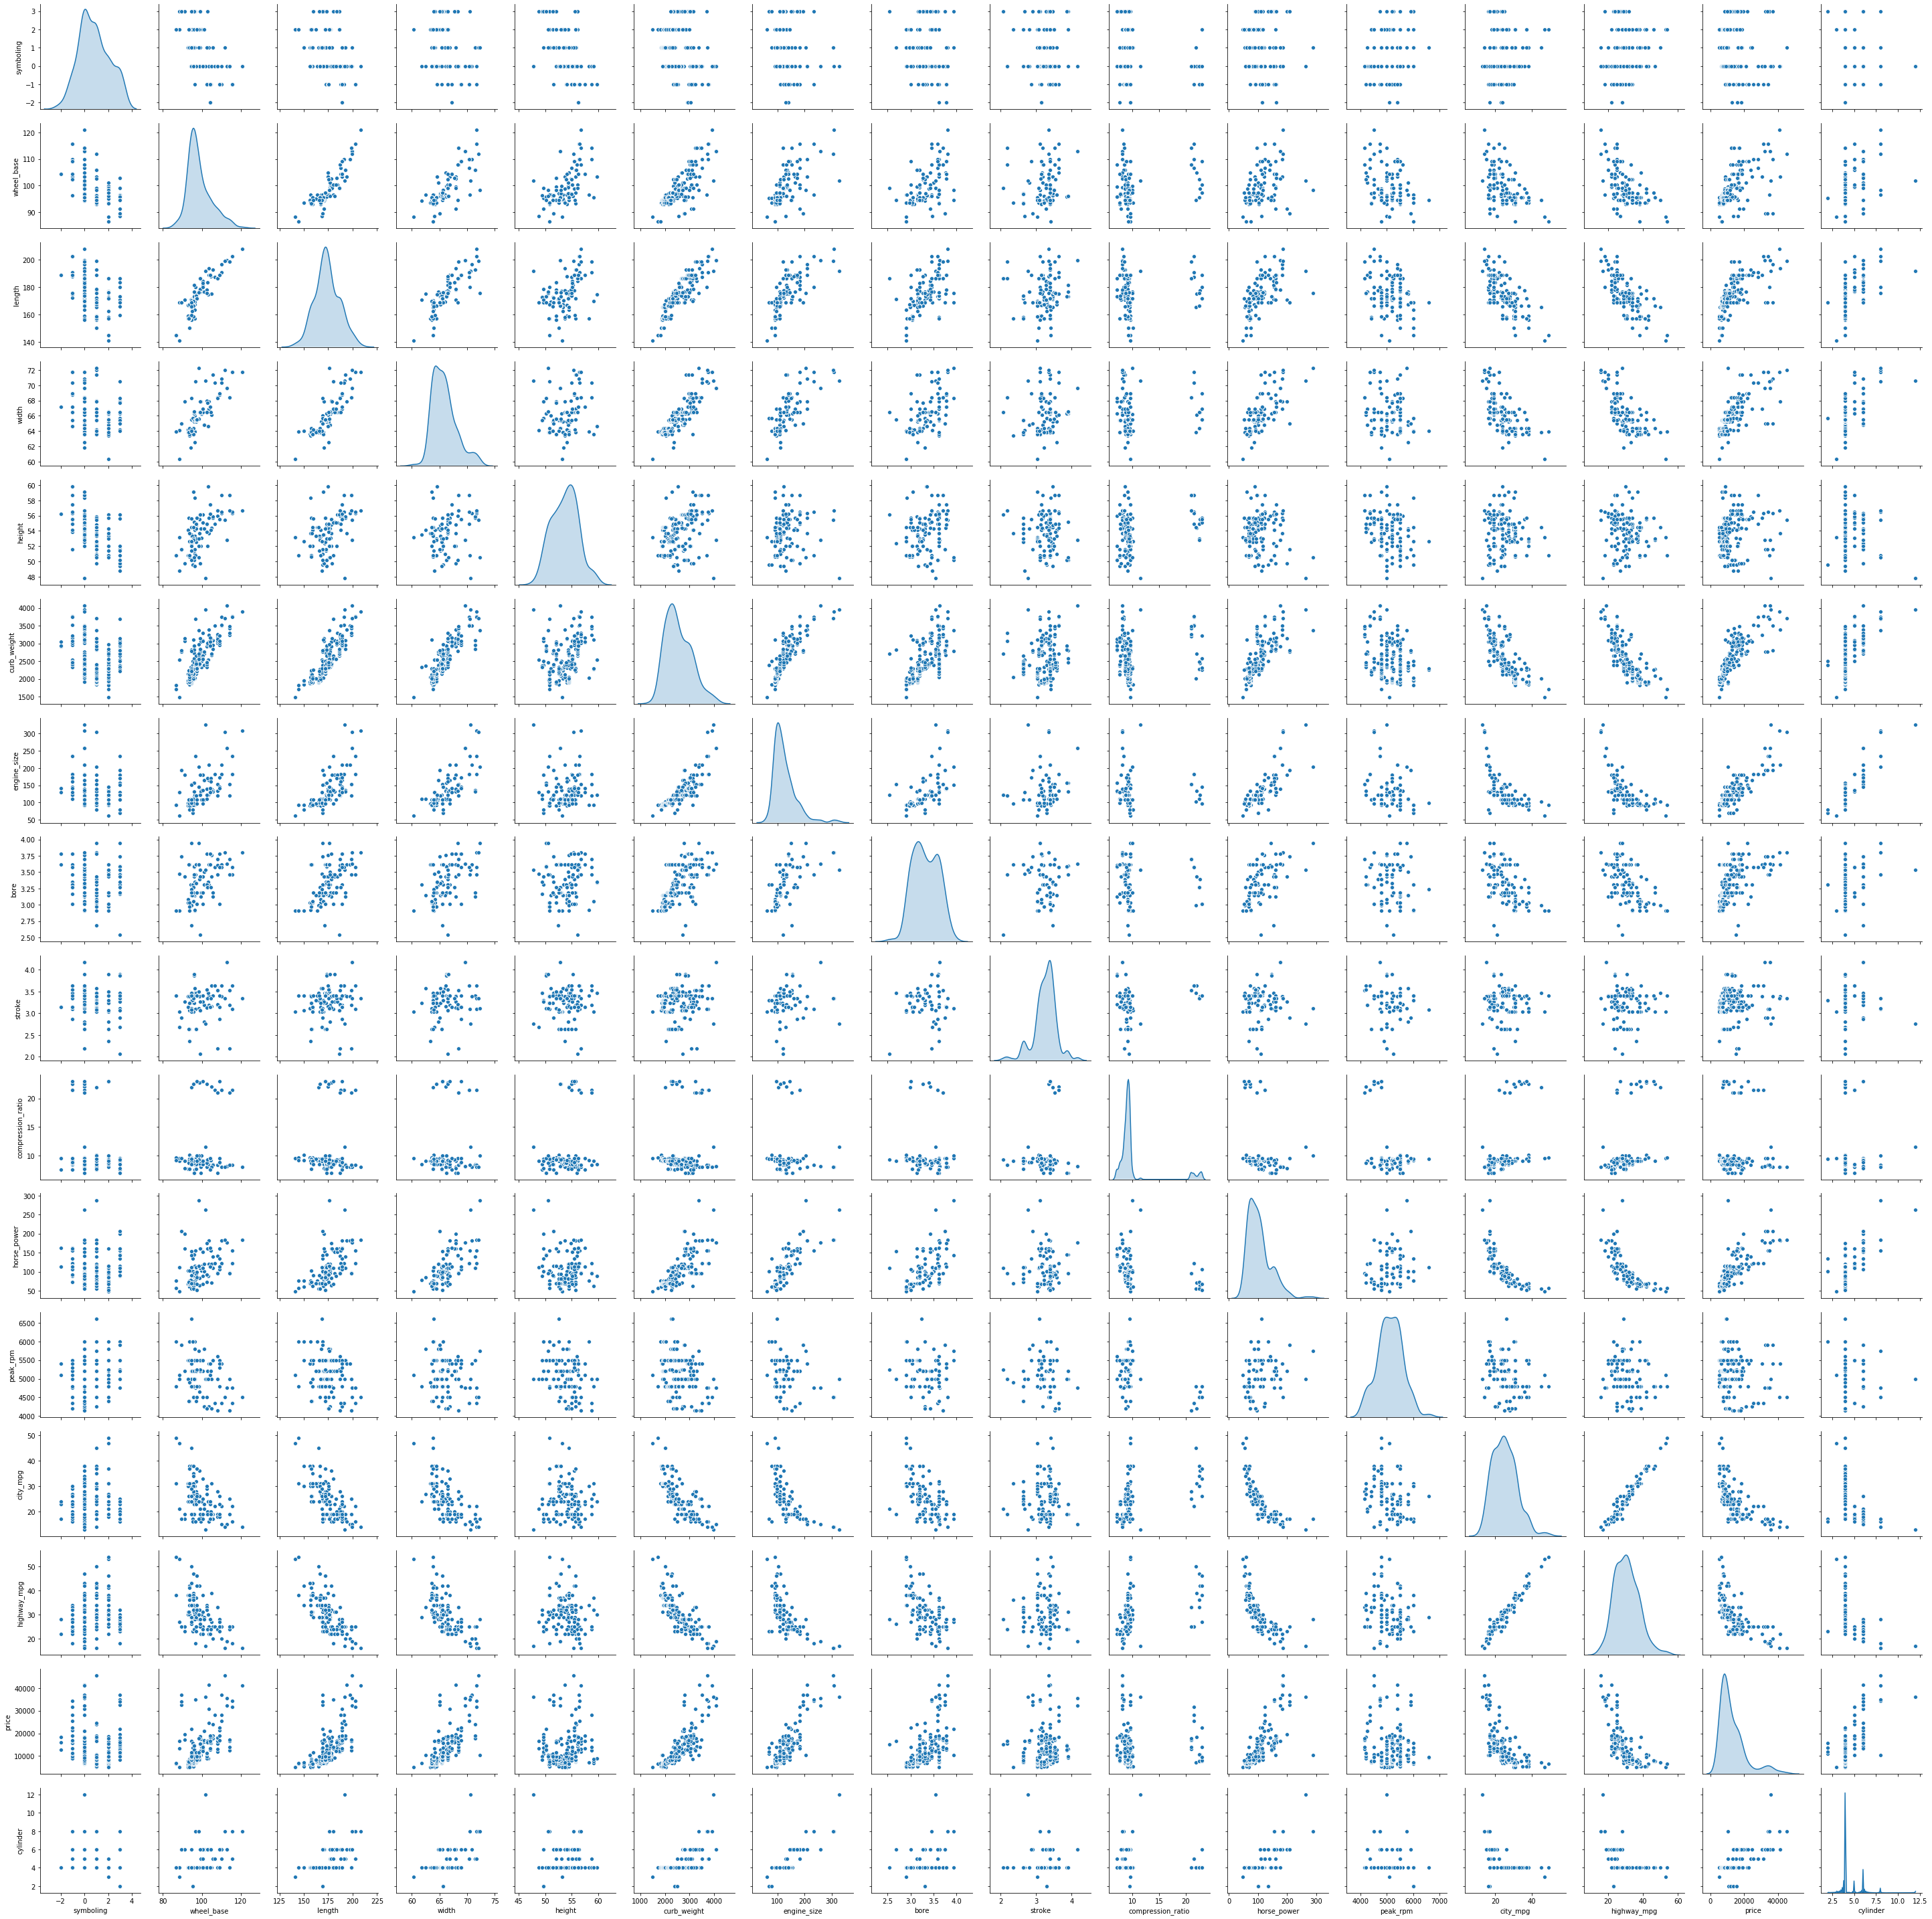

In [33]:
#sns.pairplot(car_df_attr, diag_kind = 'kde') #Kernel Density Estimates for density graphs on diagonals
sns.pairplot(car_df, diag_kind = 'kde')

In [57]:
X = car_df.drop('price', axis = 1)
X = X.drop('num_of_cylinders', axis = 1) #as we already have cylinder derived from 'num_of_cylinders'


In [58]:
y = car_df[['price']]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
for idx, col_names in enumerate(X_train.columns):
    print("The Coefficient for {} is {}".format(col_names, model.coef_[0][idx]))

The Coefficient for symboling is 88.57794900973566
The Coefficient for wheel_base is 71.82402760934986
The Coefficient for length is -93.3844787201191
The Coefficient for width is 479.81643559267866
The Coefficient for height is 315.2038400121214
The Coefficient for curb_weight is -0.8657326891351419
The Coefficient for engine_size is 251.74362582792023
The Coefficient for bore is -6832.550987635414
The Coefficient for stroke is -5085.81885979059
The Coefficient for compression_ratio is 335.7682519296386
The Coefficient for horse_power is -0.03898796131217402
The Coefficient for peak_rpm is 2.4300494935823127
The Coefficient for city_mpg is -201.81713200347048
The Coefficient for highway_mpg is -41.934319357320746
The Coefficient for cylinder is -3176.176090372959


In [64]:
intercept = model.intercept_[0]

In [65]:
intercept

-12323.060174569477

In [67]:
import statsmodels.formula.api as smf

In [69]:
cars = pd.concat([y_train,X_train], axis = 1)

In [70]:
cars.head()

,price,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,cylinder
14,24565.0,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,6
162,9258.0,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70.0,4800.0,28,34,4
59,8845.0,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,4
19,6295.0,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,4
177,11248.0,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92.0,4200.0,27,32,4


In [ ]:
smf.ols